# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'C:\Users\irikh\iCloudDrive\Data analytics\COURSE DATA ANALYTIC\COURSE DATA IMMERG\A6'

In [5]:
# Import data

citibike = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'c_wrangled.csv'), index_col = False)

### 2. Data Cleaning

#### Drop columns

In [6]:
citibike.shape

(42990, 18)

In [6]:
citibike.columns

Index(['Unnamed: 0', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber', 'birth_year', 'gender', 'trip_duration_min'],
      dtype='object')

In [7]:
# Drop column 
cb = citibike.drop(columns = ['Unnamed: 0', 'subscriber'])

In [8]:
cb.dtypes

bike_id                      int64
weekday                     object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
birth_year                   int64
gender                       int64
trip_duration_min            int64
dtype: object

In [9]:
cb.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender,trip_duration_min
0,16013,Mon,18,09/09/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,1968,2,16
1,15230,Thu,18,12/09/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,1983,1,9
2,17942,Wed,19,18/09/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,1989,1,6
3,19683,Sat,11,28/09/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,1988,2,9
4,14581,Fri,22,27/09/2013 22:01,293,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,1986,2,7


### 3. Exploring Relationships

### Correlations:

In [10]:
# Dropping unnecessary columns
cb_corr = cb.drop(columns = ["weekday", "start_time", "start_station_name", "end_time", "end_station_name"])

In [11]:
# Create a correlation matrix using pandas

cb_corr.corr()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,birth_year,gender,trip_duration_min
bike_id,1.000000,0.000082,0.003131,-0.009500,0.001190,0.004200,-0.008007,0.001241,0.006637,-0.002405,0.006206
start_hour,0.000082,1.000000,-0.003716,-0.003221,-0.045702,0.004748,-0.037957,0.010212,0.064174,0.013901,0.049006
start_station_id,0.003131,-0.003716,1.000000,0.106793,0.086136,0.043058,0.057236,0.023404,-0.004884,-0.008547,0.046907
start_station_latitude,-0.009500,-0.003221,0.106793,1.000000,0.203809,0.053579,0.579034,0.067613,-0.046358,-0.065475,-0.016430
start_station_longitude,0.001190,-0.045702,0.086136,0.203809,1.000000,0.022998,0.082144,0.403156,0.028819,-0.018407,0.001444
end_station_id,0.004200,0.004748,0.043058,0.053579,0.022998,1.000000,0.104477,0.090609,-0.004413,-0.008130,0.036876
end_station_latitude,-0.008007,-0.037957,0.057236,0.579034,0.082144,0.104477,1.000000,0.189852,-0.043171,-0.062110,-0.046535
end_station_longitude,0.001241,0.010212,0.023404,0.067613,0.403156,0.090609,0.189852,1.000000,0.039263,-0.023634,0.000086
birth_year,0.006637,0.064174,-0.004884,-0.046358,0.028819,-0.004413,-0.043171,0.039263,1.000000,0.069496,-0.046131
gender,-0.002405,0.013901,-0.008547,-0.065475,-0.018407,-0.008130,-0.062110,-0.023634,0.069496,1.000000,0.103072


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

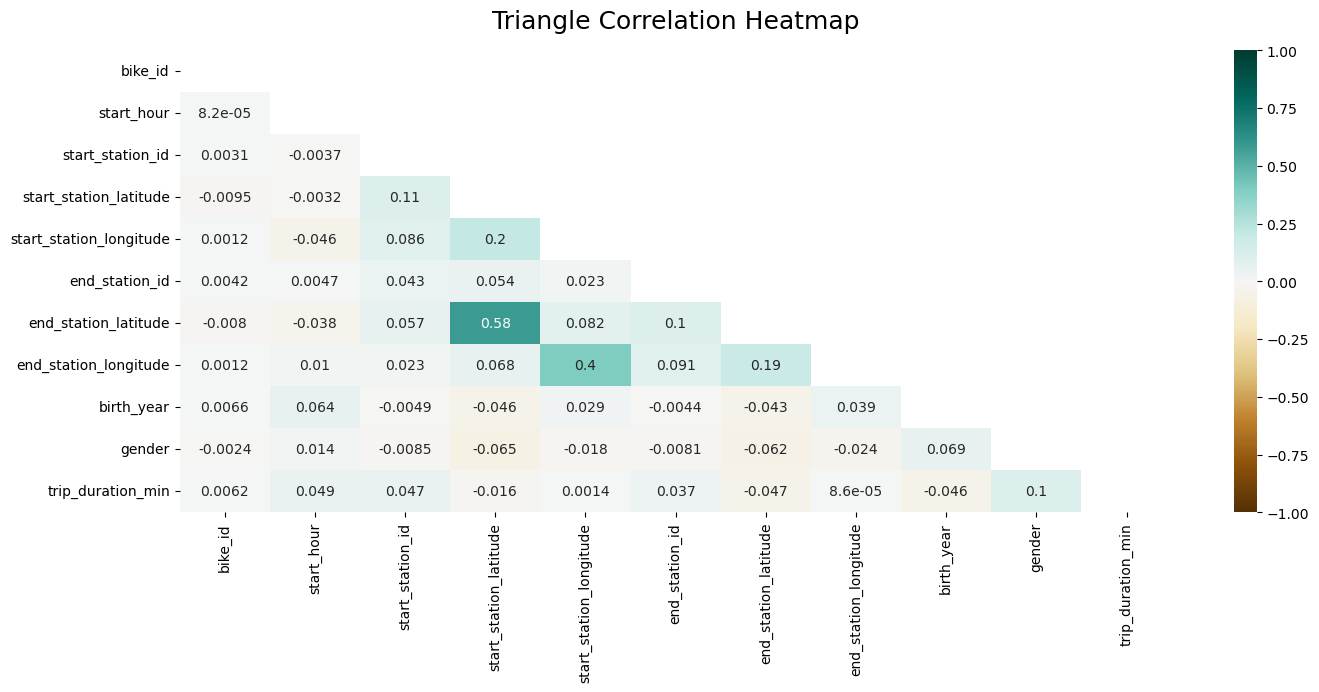

In [12]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cb_corr.corr(), dtype=bool))
heatmap = sns.heatmap(cb_corr.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### There are no strong correlation beetween any variables. A 0.58 and 0.4. coefficient indicates a medium positive correlation between "start station latitude" and "end station latitude" can give us general idea of what station are most pick-up or drop-off.  Rest coeficients are very low which tells about very weak correlation. 

In [13]:
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [14]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\irikh\\iCloudDrive\\Data analytics\\COURSE DATA ANALYTIC\\COURSE DATA IMMERG\\A6\\03 Scripts'

### Scatterplots:

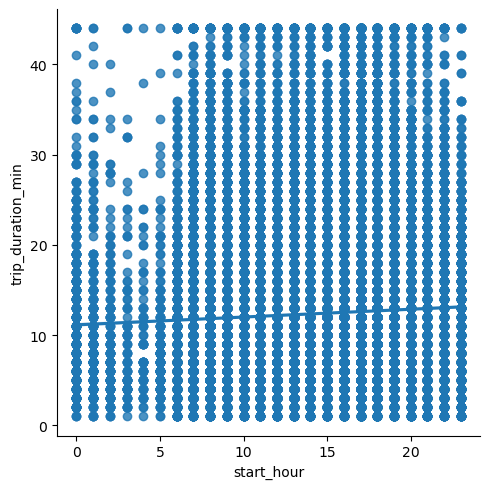

In [15]:
# Create a scatterplot for the "trip_duration" and "start hour" columns in seaborn

sns.lmplot(x = 'start_hour', y = 'trip_duration_min', data = cb_corr)

### While there is, indeed, a weak positive relationship, the trend line isn’t very steep, and there are many points far away from this line. This scatterplot, then, shows you that the relationship between the two variables "Trip duration min” and “Start hour” isn’t purely linear (i.e., it doesn’t only trend in a single direction) 

### The non-linear trend and the large number of points that don’t fall close to the trend line all show you that the correlation coefficient alone isn’t enough to produce a holistic view of the relationship between these two variables.

### Pair Plots:

In [16]:
# Keep only the variables you want to use in the pair plot

cb_pplot = cb[[ 'weekday', 'start_hour', 'start_time', 'end_time', 'start_station_name','end_station_name', 'birth_year', 'trip_duration_min']]

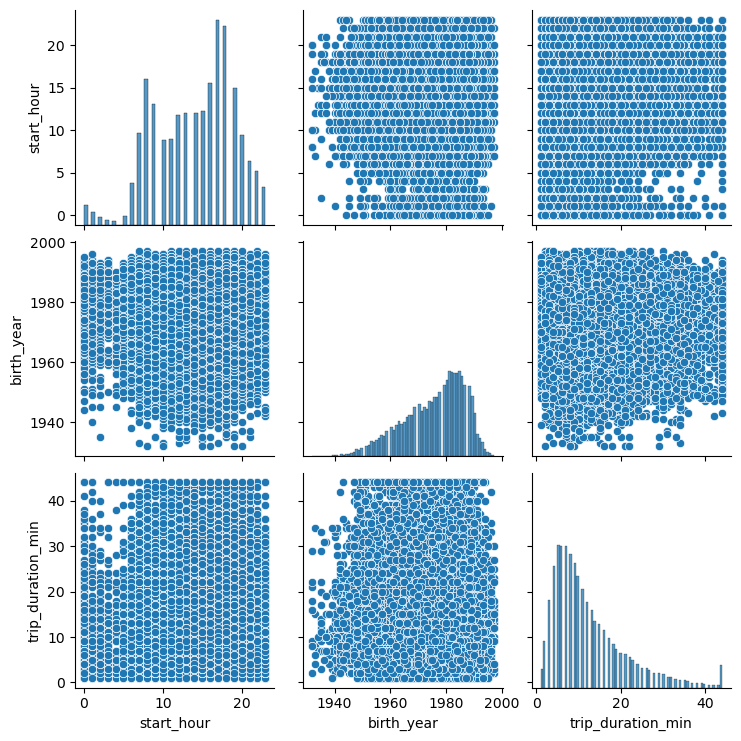

In [17]:
# Create a pair plot 

g = sns.pairplot(cb_pplot)

### Trip duration - Start hour. Trip duration longer during working hours (8am - 8 pm) than an night till morning. 
### Trip duration - Birth year. Users with birth year from 1950 make longer trip duration. 
### Birth year - Start hour. Majority Users with birth year from 1940 start trip at  8 am. Users with birth year from 1960 (young age) starts trip at 0 am and so.
 

### Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

<Axes: xlabel='birth_year', ylabel='Count'>

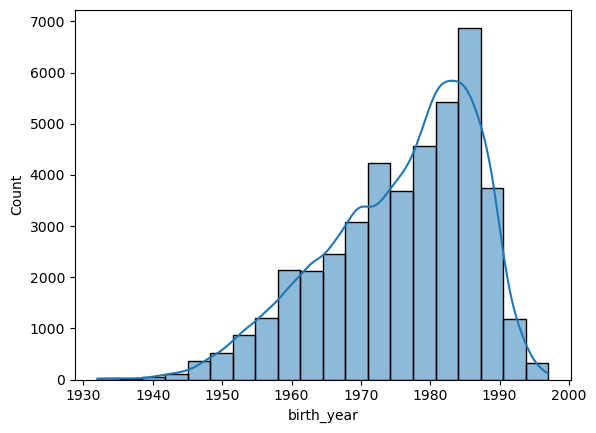

In [18]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(cb['birth_year'], bins = 20, kde = True)

In [19]:
cb.loc[cb['birth_year'] > 1983, 'Birth category'] = '18-30'

In [20]:
cb.loc[(cb['birth_year'] <= 1984) & (cb['birth_year'] > 1963), 'Birth category'] = '31-50'

In [21]:
cb.loc[(cb['birth_year'] <= 1964) & (cb['birth_year'] > 1943), 'Birth category'] = '51-70'

In [22]:
cb.loc[cb['birth_year'] <= 1944, 'Birth category'] = '71+'

In [23]:
cb['Birth category'].value_counts(dropna = False)

Birth category
31-50    25230
18-30    10324
51-70     7228
71+        208
Name: count, dtype: int64

In [24]:
cb.columns

Index(['bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'birth_year', 'gender', 'trip_duration_min', 'Birth category'],
      dtype='object')

In [1]:
# Create a categorical plot in seaborn using the birth categories created above
sns.set(style="ticks")
birth_category = sns.catplot(x="trip_duration_min", y="birth_year", hue="Birth category", data=cb)

NameError: name 'sns' is not defined

### Clients age 31-50 makes more frequent longer duration rides, following by group 51-70. Less frequent longer duration trip makes clients 71+.

In [29]:
# fig = g.get_figure()
birth_category.savefig("out2.png") 

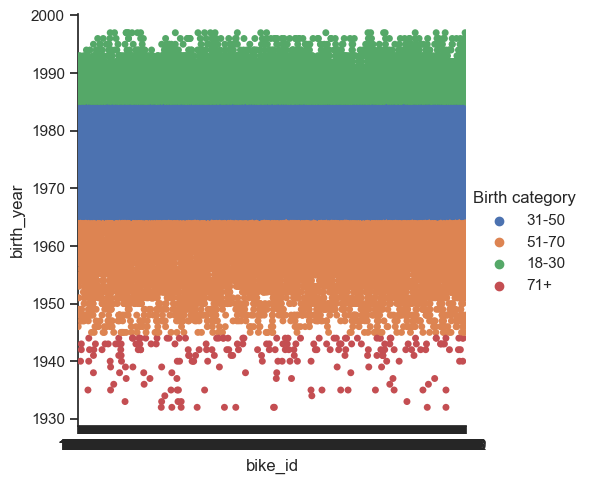

In [30]:
# Create a categorical plot in seaborn using the birth categories created above
sns.set(style="ticks")
birth_category2 = sns.catplot(x="bike_id", y="birth_year", hue="Birth category", data=cb)

### More ride bikes count realise age group 31-50, following by 51-70, despues 18-30. Less bike rides make age group 71+.

In [31]:
# fig = g.get_figure()
birth_category2.savefig("out3.png") 